# Practical 2: Linear Regression - ANSWERS

The following exercices are answers to the questions in the `P2_Linear_Regression.pdf` file.

## ANSWERS Part A

**1.**	Load the file `cars_dataset.csv` using the python `pandas` library:

In [1]:
import pandas as pd

cars = pd.read_csv('cars_dataset.csv')

**2.** Display the variable you have just created:

In [2]:
cars.head()

,weight,horsepower,mpg
0,3504,130,18.0
1,3693,165,15.0
2,3436,150,18.0
3,3433,150,16.0
4,3449,140,17.0


**3.** Make a scatterplot for the `weight` and the `horsepower` columns.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

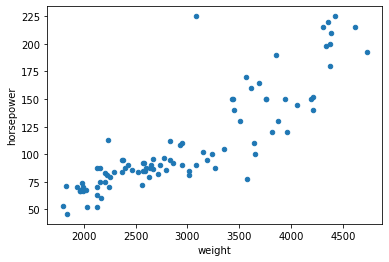

In [3]:
ax = cars.plot.scatter(x='weight', y='horsepower')

**4.** Create two variables, `X` and `y`, from the `weight` and `horsepower` columns  

In [4]:
X = cars[['weight']]
y = cars['horsepower']

**5.** Import the `LinearRegression` function, and fit a linear regression to predict `y` from `X`

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

**6.**	Print out the slope coefficient and the intercept using the `print()` function.

In [7]:
print('Slope:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)

Slope: [0.04870995]
Intercept: -34.95939783820717


**7.** Make a new variable, `y_pred`, and assign it the predicted values.

In [8]:
y_pred = lin_reg.predict(X)

**8.** Assign `y_pred` to a new column in the dataset:

In [9]:
cars['predicted_horsepower'] = y_pred

**9.** Visualize the regression by plotting the actual values and the calculated values:

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html

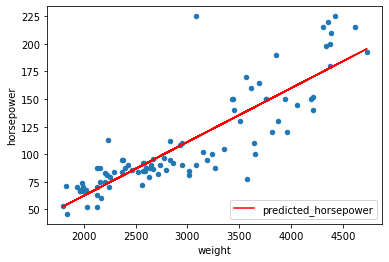

In [10]:
ax = cars.plot.scatter(x='weight', y='horsepower')

ax = cars.plot.line(x='weight', y='predicted_horsepower', ax=ax, c='red')

**10.** Calculate $R^2$ and print its value.

In [11]:
# The .score(X) method returns runs lin_reg.predict(X) with respect to y, and returns the R2 score

R2 = lin_reg.score(X, y)

print("The R2 score is", R2)

The R2 score is 0.7492529866021573


______________

# ANSWERS Part B 

Considering the same dataset, but a different pair of columns, repeat the steps in Part A to calculate the linear regression between a car's `weight` and its `miles-per-galon (MPG)` value.

In [12]:
X = cars[['weight']]
y = cars['mpg']

In [13]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

In [14]:
print('Slope:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)

Slope: [-0.00861181]
Intercept: 49.23834871194333


In [15]:
y_pred = lin_reg.predict(X)

cars['predicted_mpg'] = y_pred

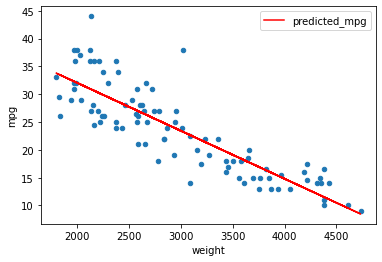

In [16]:
ax = cars.plot.scatter(x='weight', y='mpg')

ax = cars.plot.line(x='weight', y='predicted_mpg', ax=ax, c='red')

In [17]:
R2 = lin_reg.score(X, y)

print("The R2 score is", R2)

The R2 score is 0.7381009927508065


_______________________

# ANSWERS Part C 

In this part, we will train the linear regression with part of the data, and test it on another part.

**1.** Import the `train_test_split` tool, and split the data into training/testing sets, 70% for training and 30% for testing.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = cars[['weight']]
y = cars['horsepower']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**2.** Train the model using `X_train` and `y_train`, and compute the linear regression coefficients.

In [20]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

print('Slope:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)

Slope: [0.04623152]
Intercept: -30.978720720292557


**3.** Use `X_test` and `y_test` to calculate $R^2$. Print its value.

In [21]:
R2 = lin_reg.score(X_test, y_test)

print("The R2 score is", R2)

The R2 score is 0.7322116847983691


**4.** Predict the values for `y` based on `X_test`. Store that in a new variable `y_pred`.

In [22]:
y_pred = lin_reg.predict(X_test)

**5.** Make a copy of `X_test`, and add one column with `y_test`, and another with `y_pred`.

In [23]:
cars_test = X_test.copy()

cars_test['horsepower'] = y_test

cars_test['predicted_horsepower'] = y_pred

**6.** Make a scatter plot showing `X_test` vs. `y_test`, along with a line plot showing `X_test` vs. `y_pred`.

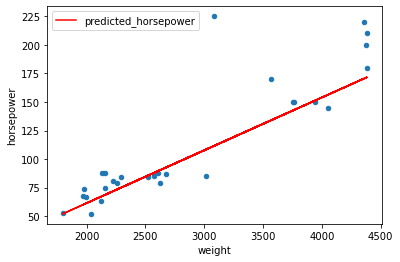

In [24]:
ax = cars_test.plot.scatter(x='weight', y='horsepower')

ax = cars_test.plot.line(x='weight', y='predicted_horsepower', ax=ax, c='red')